## HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file and creating a dataframe
df = pd.read_csv("HR_analytics.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


By looking at the dataset and problem statement, I can say that Attrition is my target column.
Also, target column data looks categorical. So I can conclude that this project is a Classification problem.

## EDA

In [3]:
#Checking shape
df.shape

(1470, 35)

Our dataset has 1470 rows and 35 columns

In [4]:
#Checking missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

I don't see any missing values in this dataset

In [7]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

These are my feature/column names

### Dataset Description
   Input features:
       
       'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'
       
----------------------------------------------------  
   Output feature:
- Attrition

In [10]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfac

I can see there are no empty observations in dataset

In [12]:
#Checking duplicates
df.duplicated().sum()

0

There are no duplicates

In [56]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

I notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values which equals our total rows. These features aren't useful for us, I'm going to drop these columns.

In [57]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [58]:
df.shape

(1470, 31)

I've successfully dropped 4 columns

#### As there are many columns, let me check it's data type and unique values so I can get categorical and continuous columns.

### Categorical Features

In [61]:
#Getting columns with dtype "object" and unique values less than 30
object_col = []
for column in df.columns:
    if df[column].dtype == object and df[column].nunique() <= 30:  #applying condition to check dtype "object" and unique values less than 30
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(f"Unique count : {df[column].nunique()}")
        print(f"{df[column].value_counts()}")
        print("----------------------------")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Unique count : 2
No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique count : 3
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Unique count : 3
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique count : 6
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------
Gender : ['Female' 'Male']
Unique count : 2
Male      882
Female    588
Name: Gender, d

In [67]:
len(object_col)

7

I got 7 columns with type=object and uniques values less than 30 

Also, I see that my target column has object class.

In [68]:
#Encoding my target Attrition
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

### Numerical Features

In [75]:
#Getting columns with dtype other than object and unique values less than 30
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:  #apllying condition
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print(f"Unique count : {df[column].nunique()}")
        print(f"Data type : {df[column].dtypes}")
        print("----------------------------")
disc_col.remove('Attrition')

Attrition : [1 0]
Unique count : 2
Data type : int32
----------------------------
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Unique count : 29
Data type : int64
----------------------------
Education : [2 1 4 3 5]
Unique count : 5
Data type : int64
----------------------------
EnvironmentSatisfaction : [2 3 4 1]
Unique count : 4
Data type : int64
----------------------------
JobInvolvement : [3 2 4 1]
Unique count : 4
Data type : int64
----------------------------
JobLevel : [2 1 3 4 5]
Unique count : 5
Data type : int64
----------------------------
JobSatisfaction : [4 2 3 1]
Unique count : 4
Data type : int64
----------------------------
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
Unique count : 10
Data type : int64
----------------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
Unique count : 15
Data type : int64
----------------------------
PerformanceRating : [3 4]
Unique count : 2
Dat

In [72]:
len(disc_col)

16

I got 17 columns with type=int and uniques values less than 30 

In [76]:
#Getting columns with dtype other than object(continuous) and unique values more than 30
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:  #applying condition
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print(f"Unique count : {df[column].nunique()}")
        print(f"Data type : {df[column].dtypes}")
        print("----------------------------")

Age : Minimum: 18, Maximum: 60
Unique count : 43
Data type : int64
----------------------------
DailyRate : Minimum: 102, Maximum: 1499
Unique count : 886
Data type : int64
----------------------------
HourlyRate : Minimum: 30, Maximum: 100
Unique count : 71
Data type : int64
----------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
Unique count : 1349
Data type : int64
----------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
Unique count : 1427
Data type : int64
----------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
Unique count : 40
Data type : int64
----------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
Unique count : 37
Data type : int64
----------------------------


In [77]:
len(cont_col)

7

I got 7 continuus columns with type=int and uniques values more than 30 

### Univariate Analysis

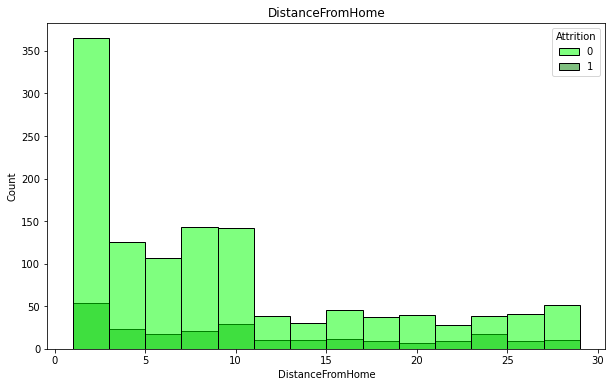

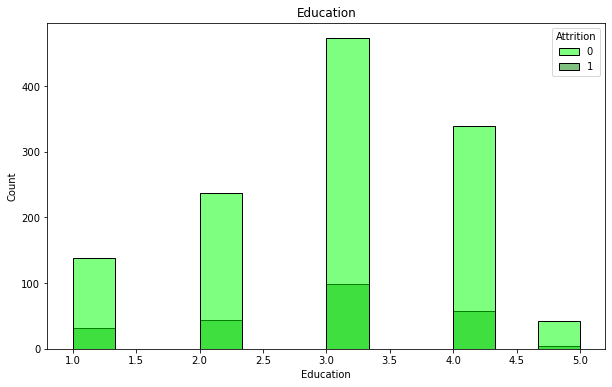

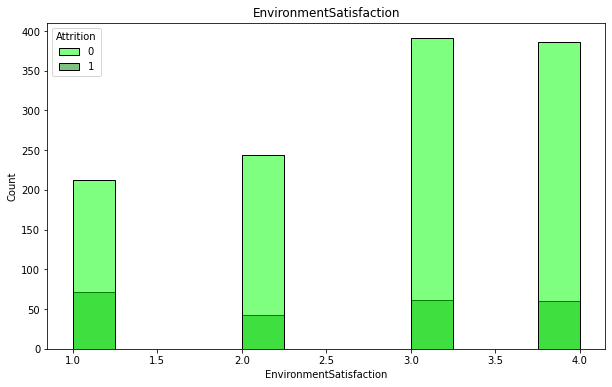

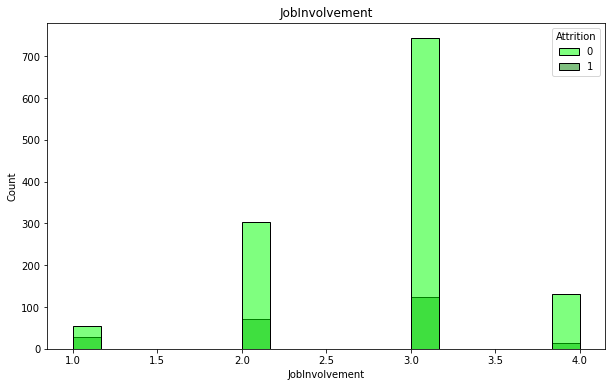

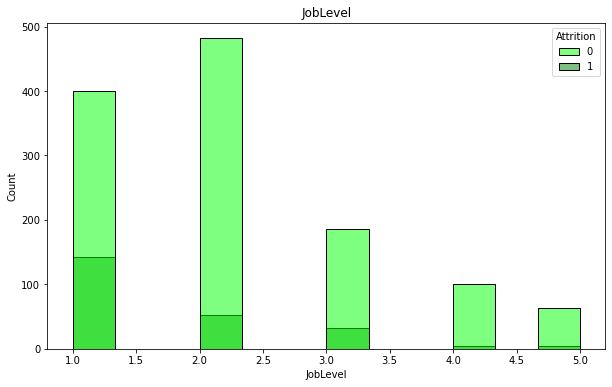

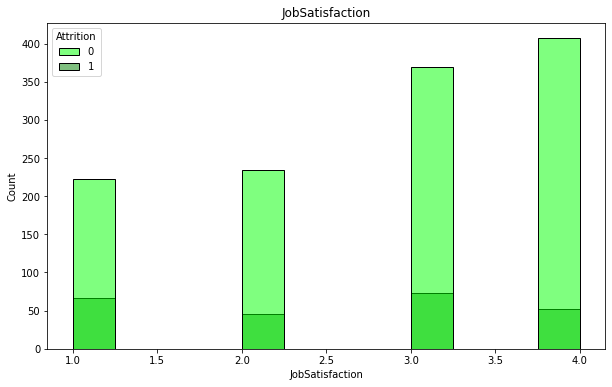

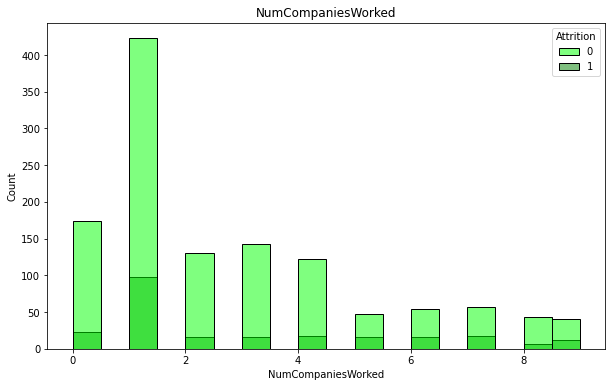

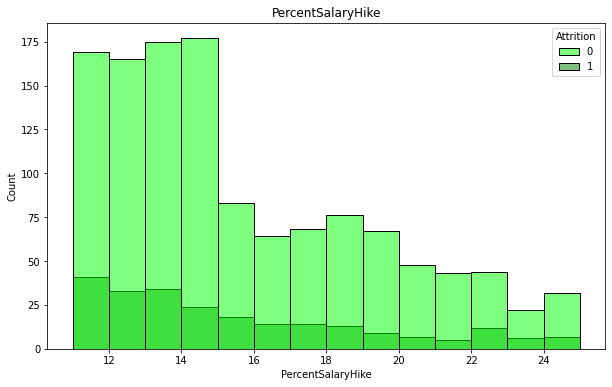

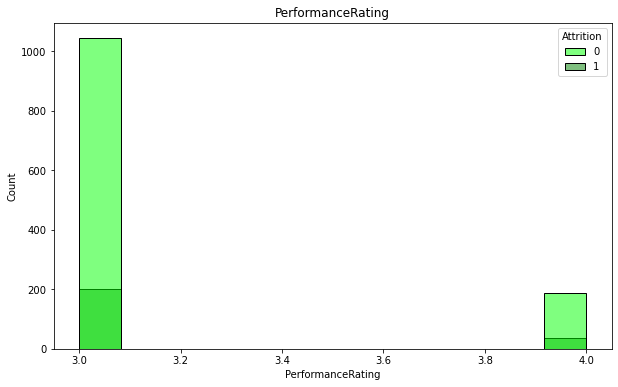

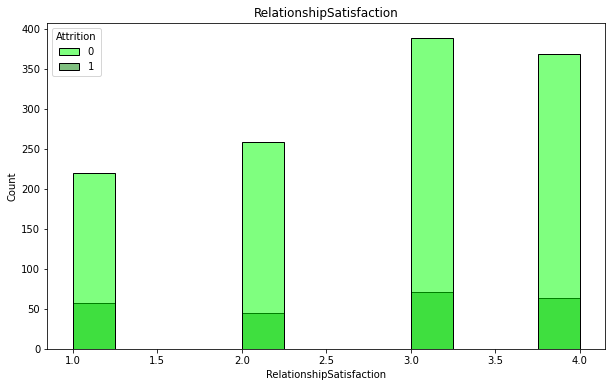

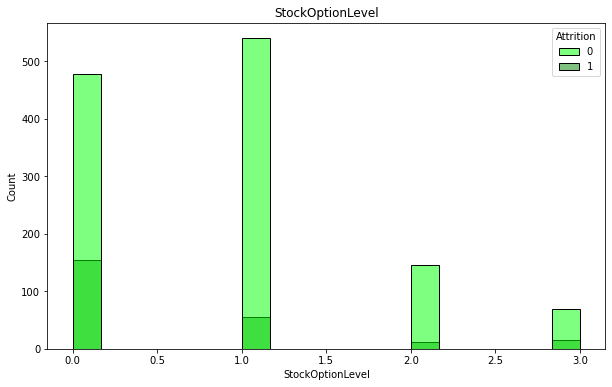

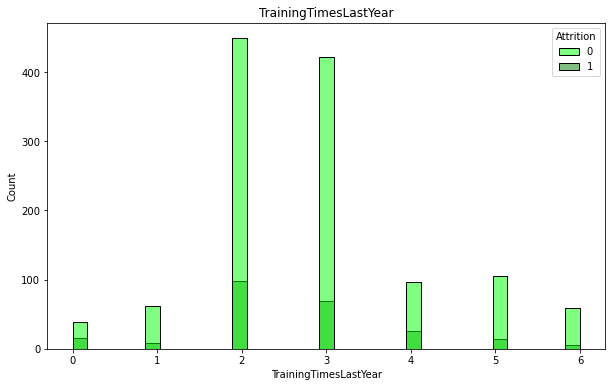

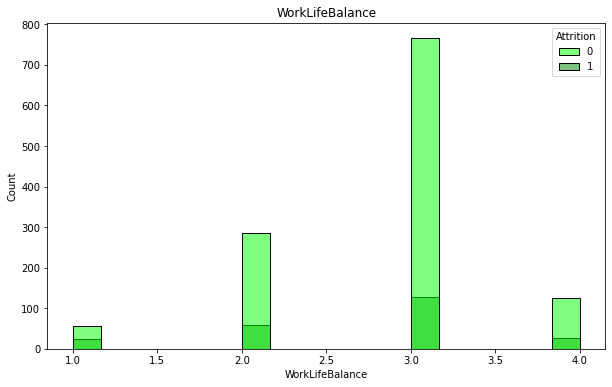

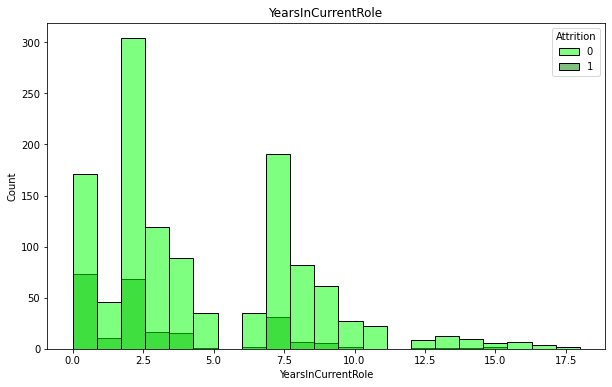

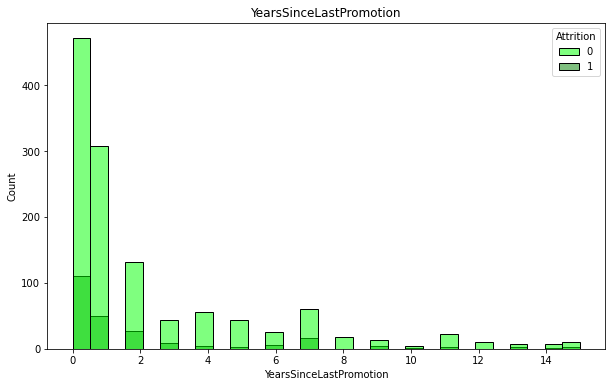

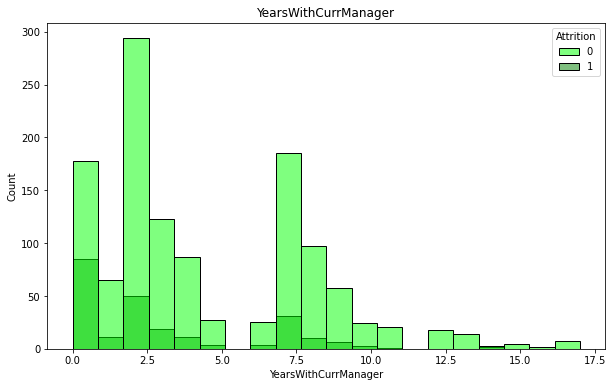

In [111]:
#Plotting all the features which are discontinuous(i.e. integer + unique)
for i in disc_col:
    plt.figure(figsize=(10,6))
    plt.title(i)
    sn.histplot(data = df, x = df[i], hue = "Attrition", kde = False, palette = ["lime", "green"])

It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't have big impact on the detrmination of Attrition of employees.

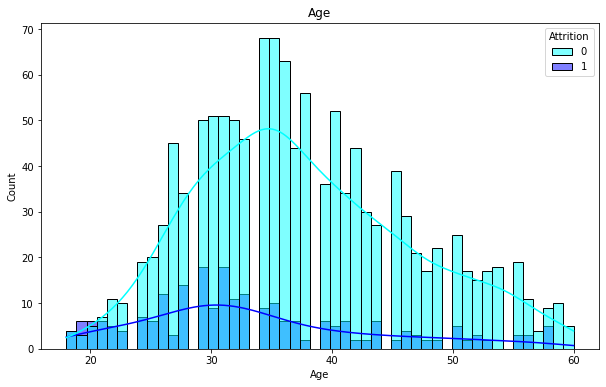

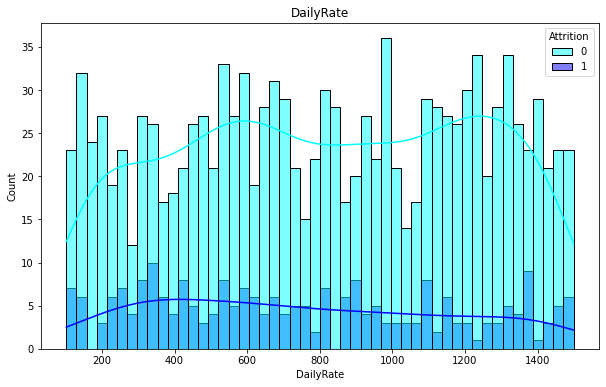

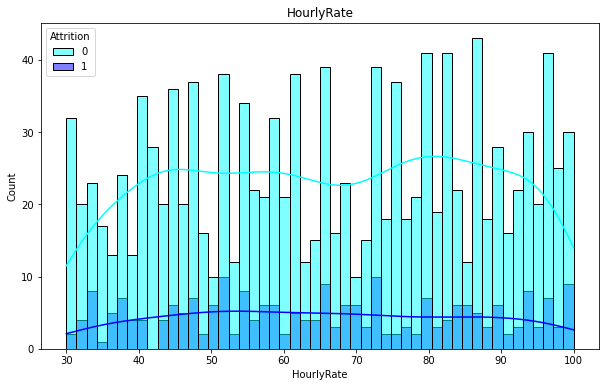

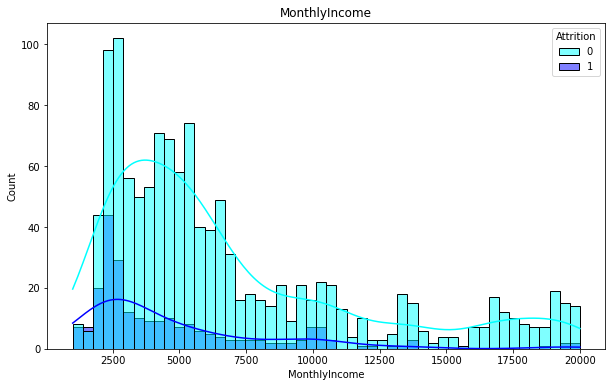

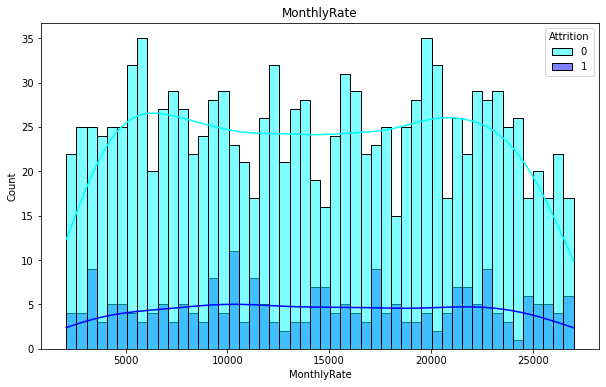

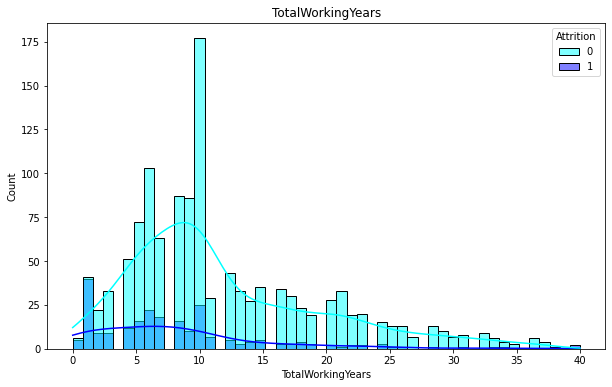

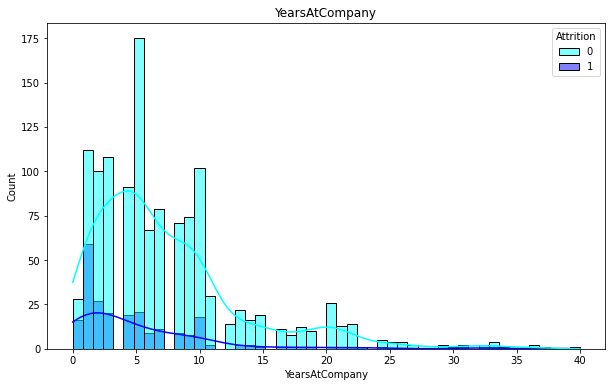

In [113]:
#Plotting all the features which are Continuous(i.e. integer + non unique)
for i in cont_col:
    plt.figure(figsize=(10,6))
    plt.title(i)
    sn.histplot(data = df, x = df[i], hue = "Attrition", kde = True, palette = ["cyan","blue"], bins=50)

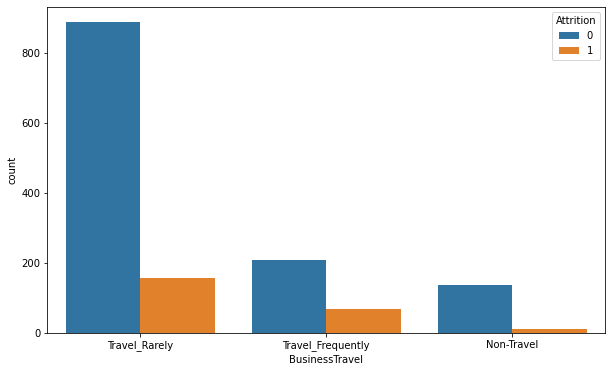

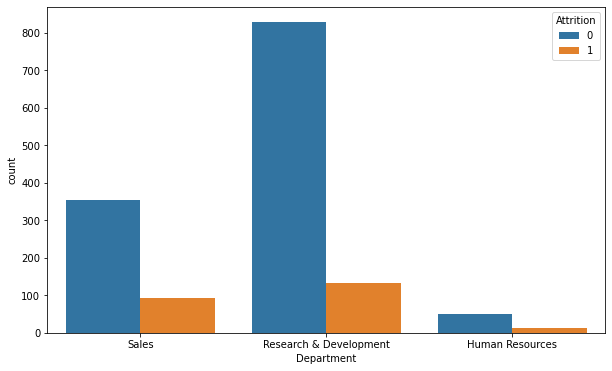

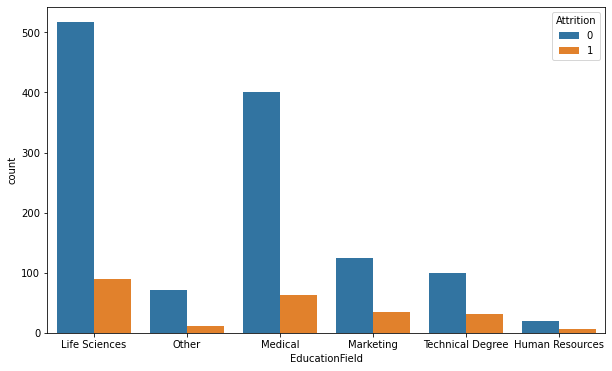

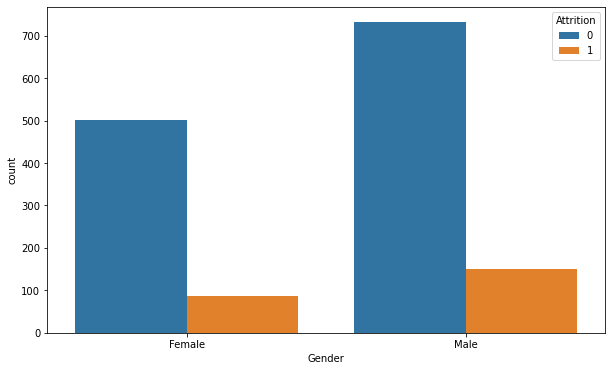

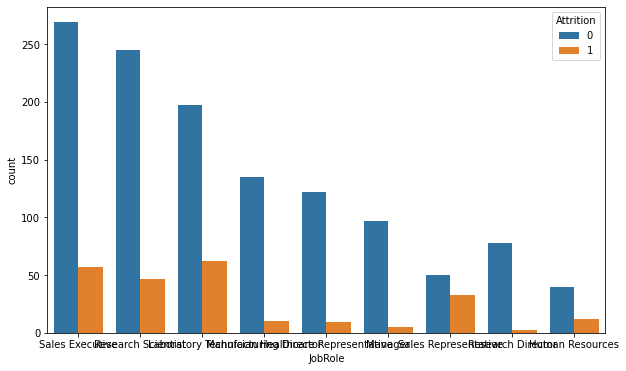

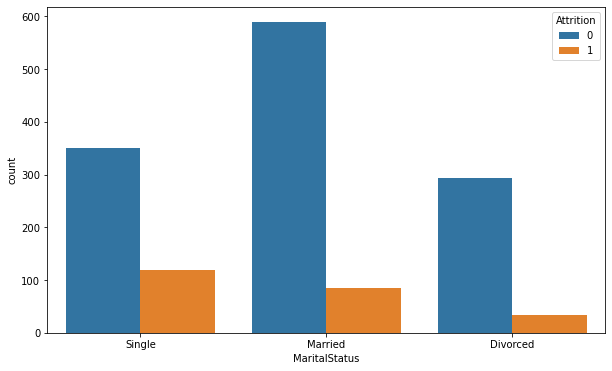

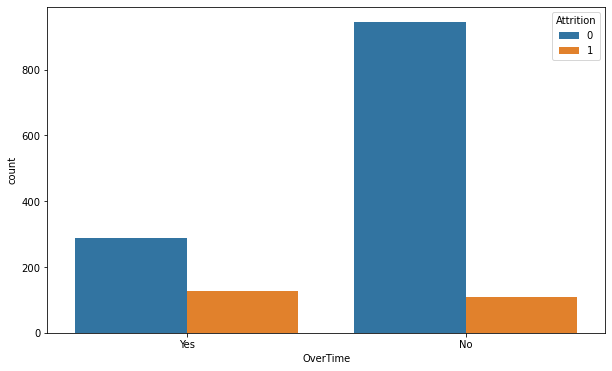

In [118]:
#Plotting all the categorical features and checking the relation with target
for i in object_col:
    plt.figure(figsize=(10,6))
    sn.countplot(df[i], hue=df['Attrition'])